# <CENTER>CLASSIFICATION<CENTER>

In [8]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.labelsize']=15
matplotlib.rcParams['xtick.labelsize']=15
matplotlib.rcParams['ytick.labelsize']=15
matplotlib.rcParams['text.color']='#FF1493'
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score,classification_report,accuracy_score

# from sklearn.metrics import mean_squared_error  #check error
# from sklearn.metrics import r2_score  #check regression score

## classification

1. Read the diabetes.csv
2. Execute upto diabeties spliting

In [9]:
diab_PATH1="E:\PERSONAL FILES\python\Data science\DATASETS\ML_Training\diabetes.csv"

In [10]:
data=pd.read_csv(diab_PATH1)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
data.shape

(768, 9)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
datacorr=data.describe()
datacorr['Outcome']

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

In [15]:
data.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [16]:
data['Outcome'].replace([1,0],['Diabetes','No Diabetes'],inplace=True)

## Spliting the data into Features class and Target class

In [17]:
x=data.iloc[:,:-1]
y=data['Outcome']

In [18]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [19]:
y

0         Diabetes
1      No Diabetes
2         Diabetes
3      No Diabetes
4         Diabetes
          ...     
763    No Diabetes
764    No Diabetes
765    No Diabetes
766       Diabetes
767    No Diabetes
Name: Outcome, Length: 768, dtype: object

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(X_train.shape," ",X_test.shape," ",Y_train.shape," ",Y_test.shape)

(614, 8)   (154, 8)   (614,)   (154,)


# Model Prediction

In [21]:
model=LogisticRegression()

In [22]:
model.fit(X_train,Y_train)

LogisticRegression()

In [23]:
modelpredict=model.predict(X_test)

In [24]:
print("Accuracy :",round(accuracy_score(Y_test,modelpredict),2)*100,"%")

Accuracy : 82.0 %


## Find the accuracy of logistic Regression based on Configuration

In [25]:
Y_test.replace([1,0],['Diabetes','No Diabetes'],inplace=True)
# modelpredict.replace([1,0],['Diabetes','No Diabetes'],inplace=True)

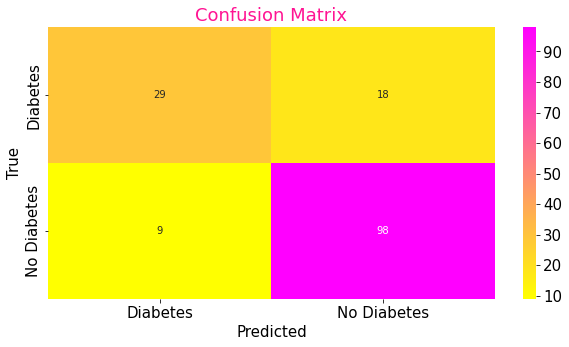

In [26]:
cnfm = pd.crosstab(Y_test, modelpredict,rownames = ['True'],colnames = ['Predicted'],margins = True)
plt.figure(figsize=(10,5))
plt.title("Confusion Matrix",fontsize = 18, color = "#FF1493")
sns.heatmap(cnfm.iloc[:2,:2],fmt="d",annot=True,cmap="spring_r")
plt.show()

In [27]:
acc=(int(cnfm.iloc[0,0])+int(cnfm.iloc[1,1]))/sum(np.array(cnfm)[:2,:2].flatten())

In [28]:
print("Accuracy from confusion matrix : ",round(acc*100),"%")

Accuracy from confusion matrix :  82 %


## Flatten

In [29]:
np.array(cnfm)[:2,:2]

array([[29, 18],
       [ 9, 98]], dtype=int64)

In [30]:
np.array(cnfm)[:2,:2].flatten()

array([29, 18,  9, 98], dtype=int64)

In [31]:
cnfm

Predicted,Diabetes,No Diabetes,All
True,,,
Diabetes,29,18,47
No Diabetes,9,98,107
All,38,116,154


In [32]:
np.array(cnfm)

array([[ 29,  18,  47],
       [  9,  98, 107],
       [ 38, 116, 154]], dtype=int64)

In [33]:
precD = (int(cnfm.iloc[0,0]))/sum(np.array(cnfm)[:1,:2].flatten())
precD


0.6170212765957447

In [34]:
precN = (int(cnfm.iloc[1,1]))/sum(np.array(cnfm)[1,:2].flatten())
precN

0.9158878504672897

In [35]:
print(classification_report(Y_test,modelpredict))

              precision    recall  f1-score   support

    Diabetes       0.76      0.62      0.68        47
 No Diabetes       0.84      0.92      0.88       107

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



# Model Validation 

Take 20 random data from X_test<br>
keep the test labels in another list<br>
Predict those 20 data and check the classification outcome.<br>
Show the successfull and unsuccessful detection in a Pie Chart<br>

In [52]:
import random 
allpreds=[]
status = []
for i in range(20):
    idx = random.randint(0,len(X_test))
    presdata = X_test.iloc[idx]
    preslbl = Y_test.iloc[idx]
    prediction = model.predict([presdata])
    allpreds.append(prediction[0])
    if prediction[0]==preslbl:
        status.append("Successful")
    else:
        status.append("Unsuccessful")
valdf = pd.DataFrame({"Status":status,})
valdf

,Status
0,Unsuccessful
1,Successful
2,Successful
3,Successful
4,Successful
5,Successful
6,Successful
7,Unsuccessful
8,Unsuccessful
9,Successful


In [53]:
valdf.value_counts()

Status      
Successful      14
Unsuccessful     6
dtype: int64

In [54]:
a=valdf.value_counts()
indx=a.index.tolist()
aval=a.tolist()
print(indx,aval)

[('Successful',), ('Unsuccessful',)] [14, 6]


In [55]:
df=pd.DataFrame({'Successful':indx,'Unsuccessful':aval})
fig = px.pie(df,names='Successful',values='Unsuccessful',color='Unsuccessful')
fig.show()